### 検定の検出力
#### 検定の例と考え方
検定とは確率分布の母数$\theta$に対する2つの仮説のいずれが正しいかをデータから決めることである。

ある製品を毎日多数製造している工場を考える。この工場では不良率が1%以下ならばよしとしているとする。
しかし、不良率が1%を超えた場合には、製造工程に何らかの異常があると考え、その原因を追究する必要がある。
$p$を不良率とし、$p_0=0.01$とすれば、製造工程が正常であるという仮説は
$$
H_0:p\leq p_0
$$
と表すことができる。また、製造工程が異常であるとする仮定は
$$
H_1:p>p_0
$$
と表すことができる。$H_0$を帰無仮説といい$H_1$を対立仮説という。
データに基づいて$H_0$が正しいと判断することを帰無仮説を採択または受容するといい、$H_1$が正しいと判断することを帰無仮説を棄却するという。
一般は、帰無仮説に対応する母数$\theta$の集合を$\Theta_0$とおき、対立仮説に対応する母数$\theta$の集合を$\Theta_1$とおけば、
帰無仮説を$H_0:\theta\in \Theta_0$また対立仮説を$H_1:\theta\in\Theta_1$と表すことができる。

例で考えた工場では、1日の終わりに$n=100$個の製品を抜取検査し、その中の不良品の数$X$が$X\geq 3$の時製造工程に異常があるのではないかと判断して調査をし、$X=0,1,2$の場合には正常の状態であるとしてそのまま翌日の操業を続けるものとする。この場合の検定方式は
「$X\geq3$ならば帰無仮説を棄却、$X\leq2$ならば帰無仮説を採択」
を表すことができる。この検定方式を$\delta_1$と表す。$X$の分布は二項分布$Bi(100,p)$であると考えることができるから、この場合二項分布における$\theta=p$が関心のある未知母数である。
また、たとえば4個以上の不良品で帰無仮説を棄却する今一つの検定方式$\delta_2$を考えることもできる。

#### 検定における過誤と検出力
検定において、帰無仮説が正しいときに帰無仮説を棄却してしまう誤りを第1種の過誤と呼び、対立仮説が正しいときに帰無仮説を採択してしまう誤りを第2種の過誤と呼ぶ。
$\delta_1$を用いた検定では、$p\leq 0.01$であるのに$X\geq3$となった場合に第1種の過誤をおかすことになり、$p>0.01$であるのに$X\leq 2$が観測された場合に第2種の過誤をおかすことになる。
良い検定とは第1種の過誤の確率及び第2種の過誤の確率のいずれも小さい検定であると考えられる。
#### 検出力関数
いま検定方式$\delta$を用いたとして、$\theta$という値に対して帰無仮説を棄却する確率を
$$
\beta_{\delta}(\theta)=P_\theta(\deltaを用いて帰無仮説を棄却)
$$
と表す。$\beta_\delta(\theta)$を検出力あるいは、$\theta$の関数として検出力関数という。
ただし、$P_\theta$は$\theta$が真のときの確率を表す。
一般に検定方式$\delta$は観測値$X_1,\cdots,X_n$の関数$t=t(X_!,\cdots,X_n)$とある限界値$t_0$を用いて、$t>t_0$ならば帰無仮説を棄却し、$t\leq t_0$ならば帰無仮説を受容するという不等式で表すことが多い。
この場合の$t$を検定統計量といい、限界値$t_0$を棄却点あるいは有意点という。
また、$t>t_0$となる範囲を棄却域という。このとき、検定方式$\delta$の検出力関数は
$$
\beta_\delta(\theta)=P_\theta(t(X_1,\cdots,X_n)>t_0)
$$
と表される。

例の$\delta_1$では$\theta=p$で$t(X)=X$であり、$t_0=2$である。
$$
\begin{align}
\beta_{\delta_1}(p)&=P_p(X\geq 3)\\
&=1-P_p(X=0)-P_p(X=1)-P_p(X=2)\\
&=1-(1-p)^n-n(1-p)^{n-1}-\frac{n(n-1)}{2}p^2(1-p)^{n-2}
\end{align}
$$
となる。同じく$\delta_1$については
$$
\begin{align}
\beta_{\delta_1}(p)&=P_p(X\geq 4)\\
&=\beta_{\delta_1}(p)-P_p(X=3)\\
\end{align}
$$
となっている。

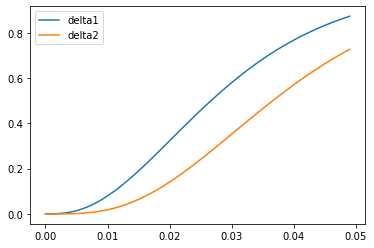

In [28]:
from scipy.special import comb
import numpy as np
import matplotlib.pyplot as plt

def beta_delta(p, thresh):
    c = lambda x: comb(100, 100-x, exact=True)
    result = 1
    for i in range(thresh):
        result -= c(i)*(p**i)*((1-p)**(100-i))
    return result

p=np.arange(0,0.05,0.001)
beta1 = beta_delta(p, 3)
beta2 = beta_delta(p, 4)

plt.plot(p, beta1, label='delta1');
plt.plot(p, beta2, label='delta2');
plt.legend();

#### 良い検定方式
検出力関数を用いれば、検定方式の第1種の過誤の確率は、棄却の確率だから、
$$
\beta_\delta(\theta),\hspace{4mm}\theta\in\Theta_0
$$
また、第2種の過誤の確率は、採択の確率だから
$$
1-\beta_\delta(\theta),\hspace{4mm}\theta\in\Theta_1
$$
と表すことができる。
良い検定方式とは2つの過誤の確率が小さいもの、すなわち帰無仮説が正しいときに検出力関数$\beta_\delta(\theta)$の値が小さく、対立仮説が正しいときに検出力関数の値が大きいような検定方式であることがわかる。
あきらかにすべての$p$について$\beta_{\delta_1}\geq \beta_{\delta_2}$である。したがって、これらのふたつの検定方式を比べると、$\delta_1$の第1種の過誤の確率は$\delta_2$のそれより大きいが、第2種の過誤の確率については逆になっていることが分かる。
一般には、仮説検定では第1種の過誤を重視し、まず第1種の過誤の確率を小さくしようとする。なぜなら、仮説検定のもとの形の有意性検定では帰無仮説の検証だけが問題となっており、そのときに冒される第1種の過誤から検定方式が決まったからである。
すなわち有意水準と呼ばれる小さな数$\alpha$を与えておいて、第1種の過誤の確率を$\alpha$以下に抑え,
$$
\beta_\delta(\theta)\leq \alpha,\hspace{3mm}\theta\in\Theta_0
$$
なる方程式だけを考える。
この検定方式を有意水準$\alpha$の検定方式という。
例では、$\delta_1$は有意水準5%の検定ではないが、$\delta_2$は有意水準5%の検定となっている。
検出力の問題を、製品の不良率から工程について調べる場合を例にとって説明したが、このような問題は品質管理における抜取検査に関連している。
品質管理の分野では検出力関数のことを作用特性曲線あるいはOC曲線と呼んでいる。
第1種の過誤をおかすと、不良品の少ない良いロットであるのに不合格とすることとなり生産者にコストがかかる。この意味で第1種の過誤の確率を生産者危機といい、第2種の過誤をおかすと、多数の不良品を含む悪いロットとされて出荷され買い手が迷惑するので、第2種の過誤の確率を消費者危機といっている。

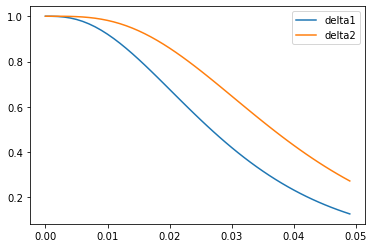

In [29]:
plt.plot(p, 1-beta1, label='delta1');
plt.plot(p, 1-beta2, label='delta2');
plt.legend();

#### 検定の分類
考えている母集団の確率分布を表す密度関数あるいは確率関数を$f_\theta(x)$とする。
$X_1,\cdots,X_n$を子の母集団からの標本の大きさ$n$の標本とする。
すなわち$X_1,\cdots,X_n$は$f_\theta(x)$を密度関数あるいは確率関数として持つ分布に従う独立な確率関数である。
いま$\theta$を一次元の実母数とするとき、検定問題は通常
$$
H_0:\theta\leq\theta_0,\hspace{3mm}H_1:\theta>\theta_0
$$
あるいは、
$$
H_0:\theta=\theta_0,\hspace{3mm}H_1:\theta\neq\theta_0
$$
のいずれかの形に定式化される。
前者を片側検定、後者を両側検定と呼ぶ。
ふたつの母集団の比較を行う検定を2標本問題という。
ふたつの母集団の分布をそれぞれ$f_{\theta_1}(x),f_{\theta_2}(x)$とし、母集団1からの観測値を$X_{1},\cdots,X_m$、母集団2からの観測値を$Y_1,\cdots,Y_n$とする。2標本問題における片側検定問題と両側検定問題はそれぞれ
$$
H_0:\theta_1\leq\theta_2,\hspace{3mm}H_1:\theta_1>\theta_2\\
H_0:\theta_1=\theta_2,\hspace{3mm}H_1:\theta_1\neq\theta_2
$$
と表される。
2標本問題の応用では、対標本とそうでない一般の場合を区別する必要がある。
対標本とは、2つの母集団からペアをなす観測値を取り出して、ペアごとに比較する場合である。
たとえば男女についてある量を比較する場合、$n$組の夫婦や兄弟姉妹を選んで違いをそれぞれ観測するような場合である。

### 主な検定と検出力
#### 正規分布に関する検定
正規分布$N(\mu,\sigma^2)$の母数$\mu,\sigma^2$に関する検定について述べる。
$X_1,\cdots,X_n$を互いに独立に正規分布$N(\mu,\sigma^2)$に従う観測値とする。
##### 母平均に関する検定
a)　$\sigma^2=\sigma_0^2$が既知の場合

まず両側検定問題を考え、帰無仮説及び対立仮説を$H_0:\mu=\mu_0,\ H_1:\mu\neq\mu_0$とする。検定統計量は標本平均$\bar{X}$を期待値と分散で標準化した
$$
Z=\frac{\sqrt{n}(\bar{X}-\mu_0)}{\sigma_0}
$$
である。帰無仮説の下で$Z$が標準正規分布に従うことに注意すれば、$z_{\alpha/2}$を標準正規分布の上側$\alpha/2$点として棄却域を
$$
|Z|>z_{\alpha/2}
$$
とすれば有意水準$\alpha$の検定が得られる。
この検定の検出力関数を具体的に計算してみると
$$
\begin{align}
\beta_\delta(\mu)&=P_\mu\bigg(|Z|>z_{\alpha/2}\bigg)\\
&=1-P_\mu\bigg(-z_{\alpha/2}<\frac{\sqrt{n}(\bar{X}-\mu_0)}{\sigma_0}<z_{\alpha/2}\bigg)\\
&=1-P_\mu\bigg(-z_{\alpha/2}-\frac{\sqrt{n}(\mu-\mu_0)}{\sigma_0}<\frac{\sqrt{n}(\bar{X}-\mu)}{\sigma_0}<z_{\alpha/2}-\frac{\sqrt{n}(\mu-\mu_0)}{\sigma_0}\bigg)\\
&=1-\Phi\bigg(z_{\alpha/2}-\frac{\sqrt{n}(\mu-\mu_0)}{\sigma_0}\bigg)+\Phi\bigg(-z_{\alpha/2}-\frac{\sqrt{n}(\mu-\mu_0)}{\sigma_0}\bigg)
\end{align}
$$
と表される。ここで$P_\mu$は$\mu$が真の母数であるときの確率を表し、$\Phi(z)$は標準正規分布の累積分布関数を表す。
片側検定$H_0:\mu=\mu_0,H_1:\mu>\mu_0$の場合にも、同じ検定統計量$Z$を用いて棄却域を
$$
Z>z_\alpha
$$
とおけばよい。この場合の検出力関数は
$$
\beta_\delta(\mu)=1-\Phi\bigg(z_\alpha-\frac{\sqrt{n}(\mu-\mu_0)}{\sigma_0} \bigg)
$$
で与えられる。

母分散が既知の場合の$Z$に基づく検定は、母分散が未知の場合の$t$検定と対比して$z$検定と呼ばれる。

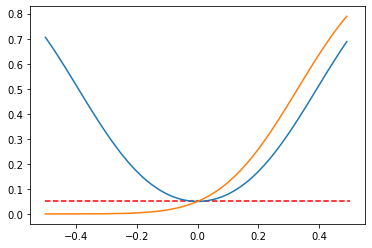

In [127]:
from scipy.stats import norm

n = 25
sigma0 = 1
alpha = 0.05
mu0 = 0.0

z_alpha = lambda alpha: norm.ppf(1-alpha)
Phi = lambda z, mu0:  norm.cdf(z-np.sqrt(n)*(mu-mu0)/sigma0)

mu = np.arange(-0.5, 0.5, 0.01)

plt.plot(mu, 1 - Phi(z_alpha(alpha/2), mu0) + Phi(-z_alpha(alpha/2), mu0))
plt.plot(mu, 1 - Phi(z_alpha(alpha), mu0))
plt.hlines(0.05, -0.5, 0.5, linestyles='--', color='red')

b)　$\sigma^2$が未知の場合
母分散が未知の場合は$t$検定が用いられる。いま、標本分散を
$$
s^2=\sum_{i=1}^n(X_i-\bar{X})^2/(n-1)
$$
とする。ここで用いる検定統計量は
$$
t=\frac{\sqrt{n}(\bar{X}-\mu_0)}{s}
$$
である。$t$は$t$統計量と呼ばれる。
両側検定および片側検定問題の有意水準$\alpha$の棄却域はそれぞれ
$$
|t|=t_{\alpha/2}(n-1),\hspace{3mm}t>t_\alpha(n-1)
$$
で与えられる。ただし、$t_\alpha(\nu)$は自由度$\nu$の$t$分布上側の点である。

##### 母平均$\mu$に関する2標本問題
a)　分散が共通で既知の場合

母分散の等しいふたつの正規母集団について母平均を比較する問題を考える。
$X_1,\cdots,X_m$を$N(\mu_1,\sigma^2)$に従う互いに独立な確率変数とし、$Y_1,\cdots,Y_n$を$N(\mu_2,\sigma^2)$に従う互いに独立な確率変数とする。ここで$\sigma^2=\sigma_0^2$は既知で、また2つの母集団で共通であるとする。
片側検定問題は$H_0:\mu_1\leq \mu_2,H_1:\mu_1>\geq\mu_2$であり、両側検定問題は$H_0:\mu_1=\mu_2,H_1:\mu_1\neq\mu_2$である。
この場合の検定統計量は
$$
Z=\sqrt{\frac{mn}{m+n}}\frac{\bar{X}-\bar{Y}}{\sigma_0}
$$
である。
片側検定および両側検定の検出力関数は$\tau=\sqrt{mn/(m+n)}(\mu_1-\mu_2)/\sigma_0$として、それぞれ
$$
\begin{align}
\beta_\delta(\mu_1,\mu_2)&=1-\Phi(z_\alpha-\tau)\\
\beta_\delta(\mu_1,\mu_2)&=1-\Phi(z_{\alpha/2}-\tau)+\Phi(-z_{\alpha/2}-\tau)
\end{align}
$$
で与えられる。

b)　分散が共通だが未知の場合

1標本の場合と同じく$t$検定を行うことになる。合併分散$s^2$を
$$
s^2=\frac{1}{m+n-2}\bigg(\sum_{i=1}^m(X_i-\bar{X})^2+\sum_{j=1}^n(Y_i-\bar{Y})^2 \bigg)
$$
とおくとき、2標本$t$統計量は
$$
t=\sqrt{\frac{mn}{m+n}}\frac{\bar{X}-\bar{Y}}{s}
$$
で与えられる。片側検定及び両側検定の有意水準$\alpha$の棄却域はそれぞれ
$$
t>t_\alpha(m+n-2),\hspace{3mm}|t|>t_{\alpha/2}(m+n-2)
$$
で与えられる。
検出力関数は、近似的には$\sigma^2$が既知の場合に等しい。

##### $\sigma^2$に関する検定
$\mu$が未知の場合、片側検定問題及び両側検定問題は$H_0:\sigma^2\leq\sigma_0^2,H_1:\sigma^2>\sigma_0^2$および$H_0:\sigma^2=\sigma_0^2,H_1:\sigma^2\neq\sigma_0^2$である。
平均からの偏差の二乗和を$\sigma_0^2$で割ったものを
$$
\chi^2=\frac{\sum_{i=1}^n(X_i-\bar{X})^2}{\sigma_0^2}
$$
とおく。片側検定及び両側検定の有意水準$\alpha$の棄却域はそれぞれ
$$
\begin{align}
\chi^2&>\chi^2_\alpha(n-1)\\
\chi^2&>\chi^2_{\alpha/2}(n-1),\hspace{3mm}\chi^2<\chi^2_{1-\alpha/2}(n-1)
\end{align}
$$
で与えられる。ただし、$\chi^2_\alpha(\nu)$は自由度$\nu$の$\chi^2$分布$\chi^2(\nu)$の上側$\alpha$点を表す。
片側検定の検出力関数を具体的に計算する。
$$
\begin{align}
\beta_\delta(\sigma^2)&=P_{\sigma^2}(\chi^2>\chi^2_\alpha(n-1))\\
&=P_{\sigma^2}\bigg(\frac{\sum(X_i-\bar{X})^2}{\sigma^2}>\frac{\sigma_0^2}{\sigma^2}\chi^2_\alpha(n-1) \bigg)\\
&=1-G_{n-1}\bigg(\frac{\sigma_0^2}{\sigma^2}\chi^2_\alpha(n-1) \bigg)
\end{align}
$$
ただし、$G_{n-1}$は自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$の累積分布関数である。同様に両側検定の検出力関数は
$$
\beta_\delta(\sigma^2)=1-G_{n-1}\bigg(\frac{\sigma_0^2}{\sigma^2}\chi^2_{\alpha/2}(n-1) \bigg)+G_{n-1}\bigg(\frac{\sigma_0^2}{\sigma^2}\chi^2_{1-\alpha/2}(n-1) \bigg)
$$
で与えられる。

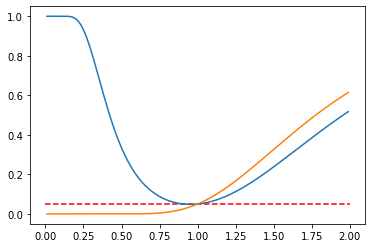

In [136]:
from scipy.stats import chi2

n = 15
sigma02 = 1
alpha = 0.05

chi2_alpha = lambda alpha: chi2.ppf(1-alpha, df=n-1)
G = lambda z, sigma2:  chi2.cdf(sigma02 / sigma2 * z, df=n-1)

sigma2 = np.arange(0.01, 2, 0.01)

plt.plot(sigma2, 1 - G(chi2_alpha(alpha/2), sigma2) + G(chi2_alpha(1-alpha/2), sigma2))
plt.plot(sigma2, 1 - G(chi2_alpha(alpha), sigma2))
plt.hlines(0.05, 0, 2, linestyles='--', color='red')

##### 分散に関する2標本問題
$\mu_1,\mu_2$がともに未知の場合、$X_1,\cdots,X_m$を$N(\mu_1,\sigma^2)$からの標本、$Y_1,\cdots,Y_n$を$N(\mu_2,\sigma^2)$からの標本とする。
片側検定問題及び両側検定問題は$H_0:\sigma_1^2\leq\sigma_2^2,H_1:\sigma_1^2>\sigma_2^2$および$H_0:\sigma_1^2=\sigma_2^2,H_1:\sigma_1^2\neq\sigma_2^2$と表される。
用いる検定統計量$F$は
$$
F=\frac{\sum_{i=1}^m(X_i-\bar{X})^2/(m-1)}{\sum_{i=1}^n(Y_i-\bar{Y})^2/(n-1)}
$$
である。片側検定および両側検定の有意水準$\alpha$の棄却域はそれぞれ
$$
\begin{align}
F&>F_\alpha(m-1,n-1)\\
F&>F_{\alpha/2}(m-1,n-1),\hspace{3mm}F<F_{1-\alpha/2}(m-1,n-1)
\end{align}
$$
と表される。
$$
\begin{align}
\beta_\delta(\sigma_1^2,\sigma_2^2)&=1-G_{m-1,n-1}\bigg(\frac{\sigma_2^2}{\sigma_1^2}F_{\alpha}(m-1,n-1) \bigg)\\
\beta_\delta(\sigma_1^2,\sigma_2^2)&=1-G_{m-1,n-1}\bigg(\frac{\sigma_2^2}{\sigma_1^2}F_{\alpha/2}(m-1,n-1) \bigg)+G_{m-1,n-1}\bigg(\frac{\sigma_2^2}{\sigma_1^2}F_{1-\alpha/2}(m-1,n-1) \bigg)
\end{align}
$$
で与えられる。ただし、$G_{\nu_1,\nu_2}$は自由度$\nu_1,\nu_2$の$F$分布$F(\nu_1,\nu_2)$の累積分布関数である。

#### 二項分布の成功確率に関する検定
$X$を二項分布$Bi(n,p)$に従う確率変数とする。$p$は成功確率で、関心のある未知母数である。
片側検定問題および両側検定問題は
$$
H_0:p\leq p_0,\hspace{3mm}H_1:p>p_0\\
H_0:p= p_0,\hspace{3mm}H_1:p\neq p_0
$$
である。検定統計量は
$$
Z=\sqrt{n}\frac{\hat{p}-p_0}{\sqrt{p_0(1-p_0)}},\hspace{2mm}\hat{p}=\frac{X}{n}
$$
である。片側検定および両側検定の近似的な有意水準$\alpha$の棄却域は
$$
|Z|>z_{\alpha/2},\hspace{3mm}Z>z_\alpha
$$
とすればよい。
片側検定の検出力を求める。
$$
\begin{align}
\beta_\delta(p)&=P_p\bigg(\frac{\sqrt{n}(\hat{p}-p_0)}{\sqrt{p_0}(1-p_0)}>z_\alpha \bigg)\\
&=P_p\bigg(\frac{\sqrt{n}(\hat{p}-p_0)}{\sqrt{p_0}(1-p_0)}>\frac{z_\alpha\sqrt{p_0}(1-p_0)-\sqrt{n}(\hat{p}-p_0)}{\sqrt{p_0}(1-p_0)} \bigg)\\
&\fallingdotseq 1-\Phi\bigg(\frac{z_\alpha\sqrt{p_0}(1-p_0)-\sqrt{n}(\hat{p}-p_0)}{\sqrt{p_0}(1-p_0)}  \bigg)
\end{align}
$$
となる。

##### 2標本問題
$X$を二項分布$Bi(m,p_1)$に従う確率変数、$Y$を二項分布$Bi(n,p_2)$に従う確率変数とし、これらは独立とする。
片側検定問題および両側検定問題は、$H_0:p_1\leq p_2,H_1:p_1>p_2$および$H_0:p_1= p_2,H_1:p_1\neq p_2$である。
いま、$\hat{p}_1=X/m,\hat{p}_2=Y/n,\hat{p}=(X+Y)/(m+n)$とおき、検定統計量$Z$を
$$
Z=\sqrt{\frac{mn}{m+n}}\frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})}}
$$
とおく。片側検定および両側検定の近似的な有意水準$\alpha$の棄却域は
$$
|Z|>z_{\alpha/2},\hspace{3mm}Z>z_\alpha
$$
とすればよい。
検出力関数は複雑となるが、$p_1$と$p_2$があまり離れていないと近似すると、片側検定の検出力は
$$
\beta(p_1,p_2)=1-\Phi\bigg(z_\alpha-\frac{p_1-p_2}{\sqrt{p_1(1-p_1)/m+p_2(1-p_2)/n}} \bigg)
$$
で与えられる。

### 標本の大きさnの決定
検定方式$\delta_2$を考える。検定は有意水準5%の検定である。
$\delta_2$の$p=0.03$での検出力$0.353$である。
製造工程が異常であっても、$\delta_2$を用いてそのような異常を見逃す過誤(第2種の過誤)の確率は$1-0.353=0.647$となる。
$n=100$を固定すれば、有意水準を変更することなしに$p=0.03$における検出力を高くすることは不可能である。
いま、$n=200$とし検定方式として今度は5個以上の不良があった場合に帰無仮説を棄却する検定方式$\delta_3$を考える。
第1種の過誤の最大値が$\beta_{\delta_3}(0.01)=0.0517$とほぼ有意水準5%であり、また、$\beta_{\delta_3}(0.03)=0.719$となり$p=0.03$における第2種の過誤の確率が$1-0.719=0.281$となる。

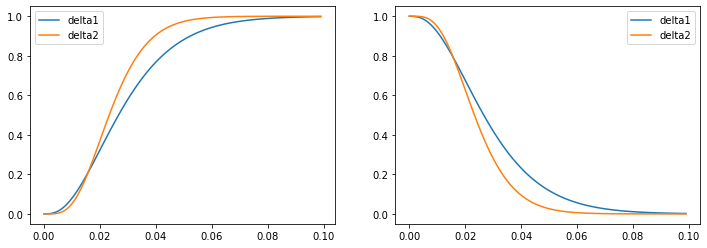

In [148]:
def beta_delta(n, p, thresh):
    c = lambda x: comb(n, n-x, exact=True)
    result = 1
    for i in range(thresh):
        result -= c(i)*(p**i)*((1-p)**(n-i))
    return result

p=np.arange(0,0.1,0.001)
beta1 = beta_delta(100, p, 3)
beta2 = beta_delta(200, p, 5)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(p, beta1, label='delta1');
ax[0].plot(p, beta2, label='delta2');
ax[0].legend();

ax[1].plot(p, 1-beta1, label='delta1');
ax[1].plot(p, 1-beta2, label='delta2');
ax[1].legend();

特効薬を用いたときの有効率を$p_0$とし、新標準薬を用いたときの有効率を$p$とする。
たとえば$p_0=0.5$であることは既知であるとする。また、$p=0.6$程度であると期待されているとする。
この場合$p>p_0$であるから、新薬は標準薬より有効と期待されている。
$H_0:p\leq p_0$を帰無仮説とする検定を行って、帰無仮説が棄却できれば良い。
$n$が小さいと、仮に$p=0.6$であっても検出力が小さいために帰無仮説が棄却できない可能性が大きい。

いま、$p=0.6$が正しいときに、検出力を$0.8$程度にしたいとする。
$p_0=0.5,p=0.6,\alpha=0.05$として、検出力$=0.8$という式
$$
\begin{align}
\beta_\delta(0.6)&=1-\Phi\bigg(\frac{z_\alpha\sqrt{p_0(1-p_0)}-\sqrt{n}(p-p_0)}{\sqrt{p(1-p)}} \bigg)\\
&=1-\Phi\bigg(\frac{1.64/2-\sqrt{n}0.1}{\sqrt{0.6\times 0.4}} \bigg)\\
=0.8
\end{align}
$$
これから、
$$
z_{0.8}=-0.84=\frac{0.82-\sqrt{n}0.1}{\sqrt{0.24}}
$$
となる。これを解くと少なくとも
$$
n=152
$$
となる。

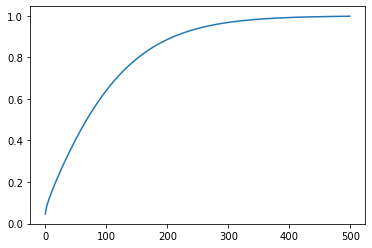

In [151]:
p0 = 0.5
p = 0.6
alpha = 0.05

z_alpha = lambda alpha: norm.ppf(1-alpha)
Phi = lambda n:  norm.cdf((z_alpha(alpha)*np.sqrt(p0*(1-p0))-np.sqrt(n)*(p-p0))/(np.sqrt(p*(1-p))))

n = np.arange(0, 500, 1)

plt.plot(n, 1 - Phi(n))

In [157]:
((z_alpha(alpha)*np.sqrt(p0*(1-p0))-z_alpha(0.8)*np.sqrt(p*(1-p)))/(p-p0))**2

152.4571333334684

#### いろいろな検定のn
a)　$\mu$に関する片側検定($\sigma^2$は未知)

$\hat{\sigma}_0^2$を$\sigma^2$に対する事前の推定値とする。
いま、特定の対立仮説$\mu>\mu_0$のところで、$\gamma(0<\gamma<1)$以上の検出力を確保したければ、標本の大きさを
$$
n\geq \frac{\sigma_0^2(z_\alpha+z_\gamma)^2}{(\mu-\mu_0)^2}
$$
とすればよい。

b)　二項分布の成功確率$p$に関する片側検定のとき

$p=p_0$となる対立仮説の点で、同じく$\gamma$以上の検出力を確保したいとすると、
$$
n\geq \frac{(z_\alpha\sqrt{p_0(1-p_0)}-z_\gamma\sqrt{p(1-p)})^2}{(p-p_0)^2}
$$
とすればよい。

### 最強力検定
検定の良さを比較するためには、第1種の過誤の確率を最小にした上で、対立仮説のもとでの検出力を最大にすればよい。
一般の検定問題を$H_0:\theta\in\Theta_0,\hspace{3mm}H_1:\theta\in\Theta_1$とする。有意水準$\alpha$の

すべての$\theta\in\Theta_0$に対し、$\beta_\delta\leq\alpha$

の検定の中で、特定の対立仮説の点$\theta_1\in\Theta_0$において検出力を最大

$\max_\delta \beta_\delta(\theta_1)=\beta_{\delta\theta_1}^*(\theta_1)$

にする検定$\delta_{\theta_1}^*$を、$\theta_1$における最強力検定という。
また、ある検定方式$\delta^*$がいかなる対立仮説の点$\theta_1\in\Theta_1$においても同時に最強力検定であるとき$\delta^*$を一様最強力検定という。